In [0]:
import torch
import torch.nn as nn
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt

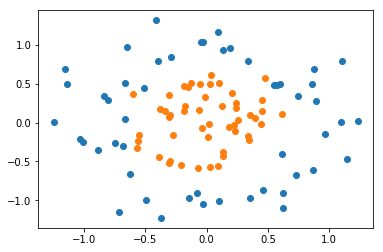

In [2]:
X, Y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.2, random_state=None, factor=0.35)
plt.plot(X[Y==0, 0], X[Y==0, 1], 'o')
plt.plot(X[Y==1, 0], X[Y==1, 1], 'o')

In [0]:
class Network(nn.Module):
  def __init__(self, in_features, hidden, out_features):
    super().__init__()
    self.linear1 = nn.Linear(in_features, hidden)
    self.linear2 = nn.Linear(hidden, out_features)
  
  def forward(self, x):
    pred = torch.sigmoid(self.linear1(x))
    pred = torch.sigmoid(self.linear2(pred))
    return pred

In [0]:
model = Network(2, 15, 1)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [0]:
epochs = 1000
X = torch.Tensor(X)
Y = torch.Tensor(Y)
for epoch in range(epochs):
  y = model.forward(X)
  loss = criterion(y, Y)
  print(epoch, loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

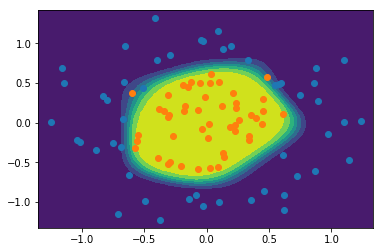

In [7]:
def plot_area(X, Y):
  plt.plot(X[Y==0, 0].numpy(), X[Y==0, 1].numpy(), 'o')
  plt.plot(X[Y==1, 0].numpy(), X[Y==1, 1].numpy(), 'o')
  x = np.linspace(min(X[:, 0]) - 0.1, max(X[:, 0]) + 0.1)
  y = np.linspace(min(X[:, 1]) - 0.1, max(X[:, 1]) + 0.1)
  xx, yy = np.meshgrid(x, y)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred = model.forward(grid)
  z = pred.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)
plot_area(X, Y)